## Elongation vs inclination from the TK03.GAD secular variation model

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag
import pmagplotlib
import ipmag
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The function below, tk03, is the TK03.py program of PmagPy modified for use in the notebook environment. This function is within ipmag and is shown below for documentation sake. This function calls upon the mktk03 function of the pmag.py module in order to generate the gauss coefficients from the tk03 model from which the declination/inclination are calculated using pmag.getvec (which itself uses the pmag.magsyn function).

In [2]:
def tk03(n=100,dec=0,lat=0,rev='no',G2=0,G3=0):
    """
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination.

    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    """
    tk_03_output=[]
    for k in range(n):
        gh=pmag.mktk03(8,k,G2,G3) # terms and random seed
        long=random.randint(0,360) # get a random longitude, between 0 and 359
        vec= pmag.getvec(gh,lat,long)  # send field model and lat to getvec
        vec[0]+=dec
        if vec[0]>=360.:
            vec[0]-=360.
        if k%2==0 and rev=='yes':
           vec[0]+=180.
           vec[1]=-vec[1]
        tk_03_output.append([vec[0],vec[1],vec[2]])
    return tk_03_output

In the code block below, the tk03 function is used to generate populations of directions at a range of latitudes (entered as inclination and then converted to latitude so that the spacing is equal in the elongation vs inclination plot). From these tk03 generated populations, the elongation is calculated as the ratio of the intermediate and smallest eigenvalues of the orientation matrix ($\tau_2/\tau_3$).

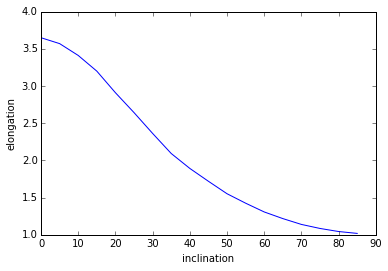

In [3]:
elongation_TK03_GAD = []
inclination_TK03_GAD = []

for inc in range(0,90,5):
    latitude = ipmag.lat_from_inc(inc)
    TK03_array = tk03(n=100000,lat=latitude)
    ppars = pmag.doprinc(TK03_array)
    elong = ppars['tau2']/ppars['tau3']
    elongation_TK03_GAD.append(elong)
    inclination_TK03_GAD.append(inc)
    
plt.plot(inclination_TK03_GAD, elongation_TK03_GAD)
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(0,90)
plt.show()

Tauxe et al. (2008) reported the best fit coefficients for the E/I equation ($E = a + bI + cI^{2} + dI^{3}$) for the TK03 model to be

model | a        |     b |         c |         d |
--- | --- | --- | --- | ---
 TK03.GAD | 2.895 | -1.466e-2 | -3.525e-4 | 3.160e-06
TK03.G20 | 2.842 | -5.961e-3 | -6.023e-4 | 4.968e-06

In the plot below, the line resulting from this best fit polynomial is shown in comparision to the elongation vs inclination resulting from the analysis of the populations created using the TK03 function above. Additionally, to check the implementation of the TK03 function above and the calculated elongation values, the tk03.py program was run at the command line generating 100,000 draws from the model at latitudes of 0, 30 and 80 using syntax like this:

`$ tk03.py -n 100000 -lat 30`

Elongation is calculated for those model output vectors in the code block below and they are plotted against the values generated within the notebook and the reported best fit coefficients for comparision.

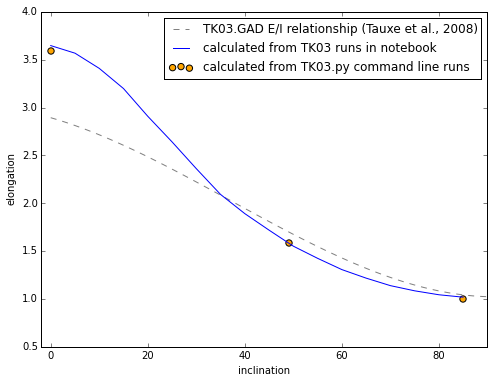

In [4]:
elongation_commandline = []
inclination_commandline = []

TK03_GAD_lat0 = np.loadtxt('TK03_commandline_lat0.txt')
ppars = pmag.doprinc(TK03_GAD_lat0)
elongation_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_commandline.append(ipmag.inc_from_lat(0))

TK03_GAD_lat30 = np.loadtxt('TK03_commandline_lat30.txt')
ppars = pmag.doprinc(TK03_GAD_lat30)
elongation_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_commandline.append(ipmag.inc_from_lat(30))

TK03_GAD_lat80 = np.loadtxt('TK03_commandline_lat80.txt')
ppars = pmag.doprinc(TK03_GAD_lat80)
elongation_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_commandline.append(ipmag.inc_from_lat(80))

xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

plt.figure(figsize=(8,6))
plt.plot(xa,TK03GAD,color='grey',linestyle='--',label='TK03.GAD E/I relationship (Tauxe et al., 2008)')
plt.plot(inclination_TK03_GAD, elongation_TK03_GAD,'b-',label='calculated from TK03 runs in notebook')
plt.scatter(inclination_commandline,elongation_commandline,s=40,c='orange',label='calculated from TK03.py command line runs')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(-2,90)
plt.legend()
plt.show()

mean inclination: 49.1066053509
calculated elongation: 1.5833945098


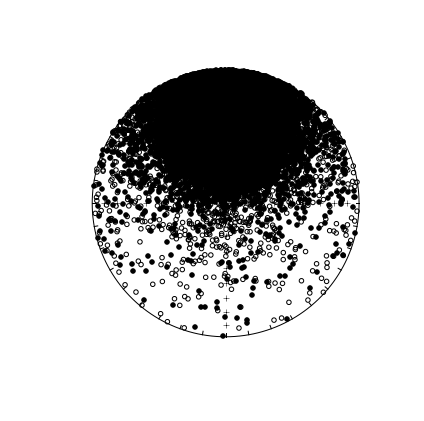

In [5]:
TK03_lat0 = np.loadtxt('TK03_EI/TK03_commandline_lat30.txt')
ppars = pmag.doprinc(TK03_lat0)
elongation = ppars['tau2']/ppars['tau3']
inclination = ipmag.inc_from_lat(30)
print 'mean inclination: ' + str(inclination)
print 'calculated elongation: ' + str(elongation)

fignum = 1
plt.figure(num=fignum,figsize=(6,6),dpi=160)
ipmag.plot_net(1)
ipmag.plot_di(TK03_lat0[:,0],TK03_lat0[:,1])
plt.show()